In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the positive and negative classes

# True Value is +1
positive_points = np.array([(-2,3),(0,1),(2,-1)])
negative_points = np.array([(-2,1),(0,-1),(2,-3)])

In [3]:
positive_points

array([[-2,  3],
       [ 0,  1],
       [ 2, -1]])

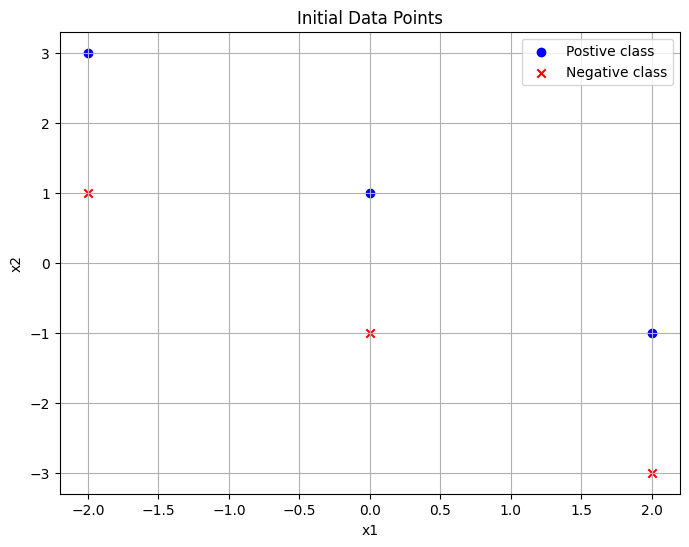

In [7]:
# Plot initial data points
plt.figure(figsize=(8, 6))
plt.scatter(positive_points[:,0], positive_points[:,1], color='blue', marker='o', label= 'Postive class')
plt.scatter(negative_points[:,0], negative_points[:,1], color='red', marker='x', label= 'Negative class')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial Data Points')
plt.grid(True)

In [11]:
# Combine all points and labels

X = np.vstack((positive_points, negative_points))
y = np.array([1]*len(positive_points) + [-1]*len(negative_points))

In [13]:
y

array([ 1,  1,  1, -1, -1, -1])

In [22]:
# Define the percdeptron algorithm

def perceptron(X, y, steps = 10):
    theta = np.zeros(X.shape[1])  # X.shape[1] refer to the number of columns in array X
    theta0 = 0
    for t in range(steps):
        for i, xi in enumerate(X):     # here counting start by default zero and enumerate use to access the variables of array
            if y[i] * (np.dot(xi, theta) + theta0) <= 0:
                theta += y[i] * xi
                theta0 += y[i]
                break
        # plot after each iteration
        plot_decision_boundary(theta, theta0, t+1)
    return theta, theta0



In [23]:
def plot_decision_boundary(theta, theta0, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(positive_points[:, 0], positive_points[:,1], color = 'blue', label ='Positive class')
    plt.scatter(negative_points[:, 0], negative_points[:,1], color = 'red', label ='Negative class')

    # Plot decision boundary
    x_values = np.linspace(-3, 3, 2)
    # Check for theta[1] to avoid devision by zero in case of vertical line
    if theta[1] != 0:
        y_values = -(theta[0] * x_values + theta0)/ theta[1]
        plt.plot(x_values, y_values, label=f'Iteration {iteration}' )
    else:
        # Plot vertical line
        x_val =-theta0 / theta[0]
        plt.axvline( x = x_val, label=f'Iteration {iteration}')

    plt.xlim(-3,3)
    plt.ylim(-4,4)
    plt.xlabel('X1')
    plt.ylabel('X2') 
    plt.title(f'Decision Boundary at Iteration {iteration}') 
    plt.legend()
    plt.grid(True) 
      

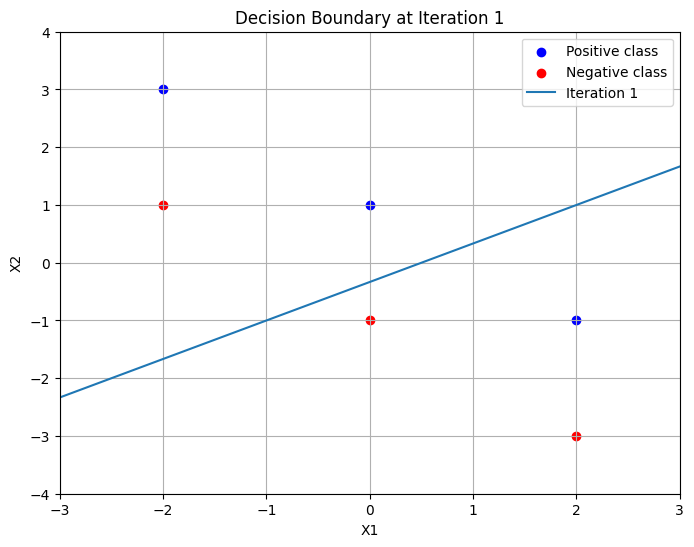

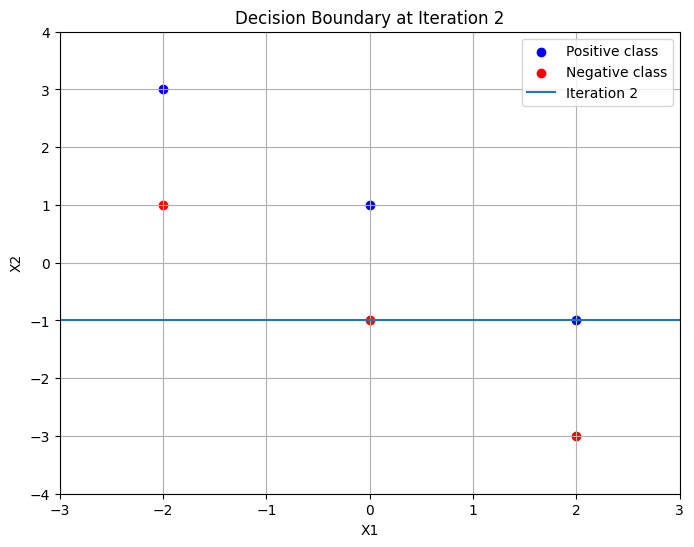

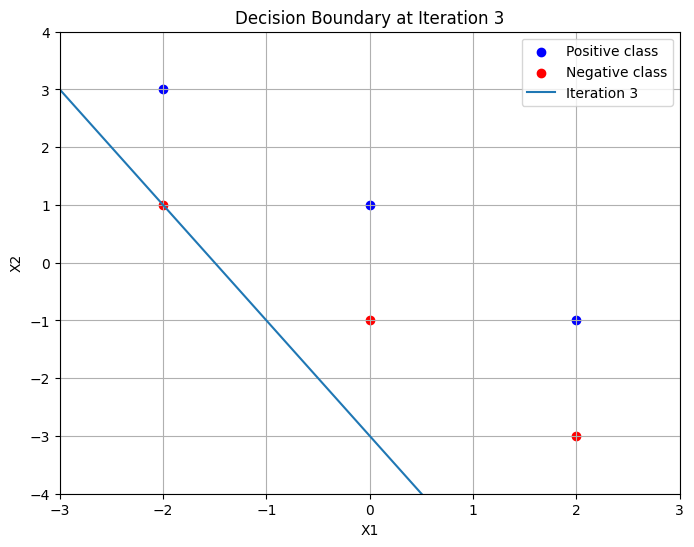

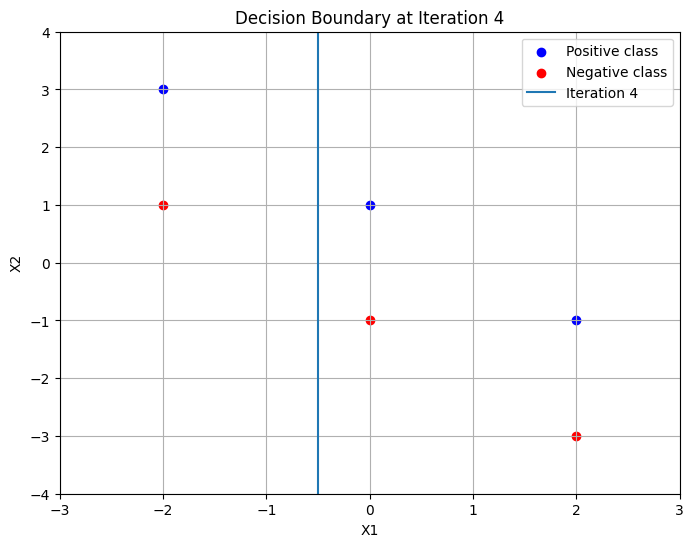

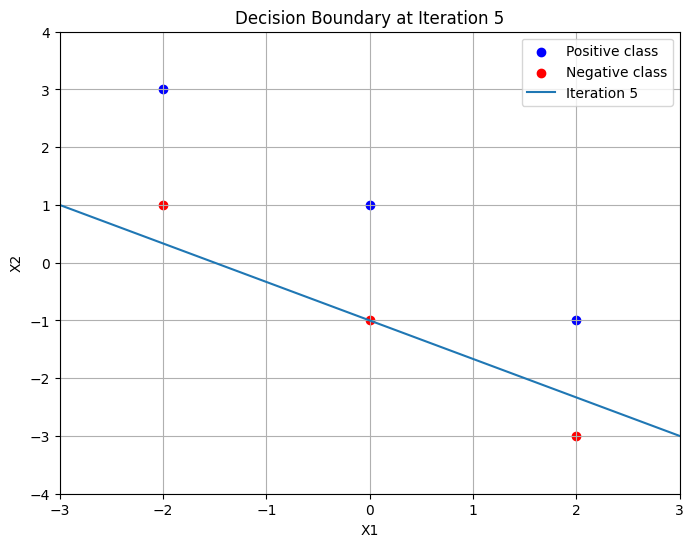

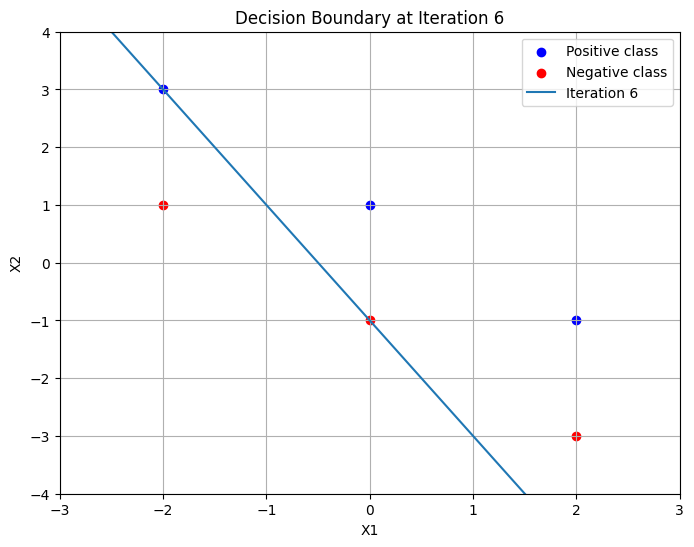

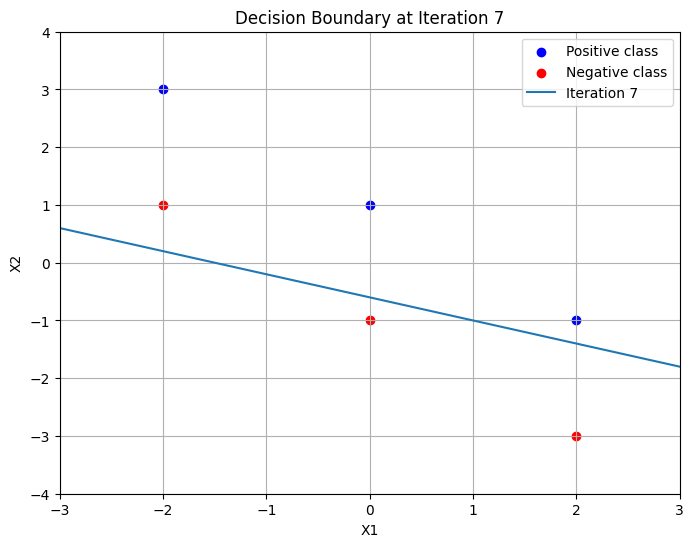

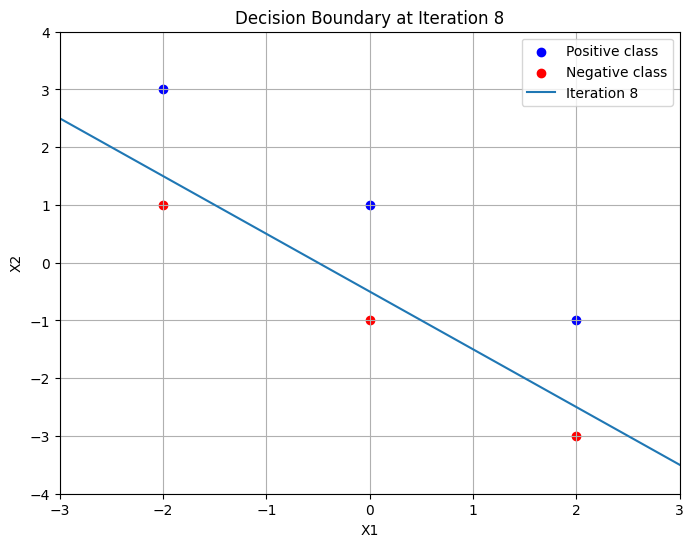

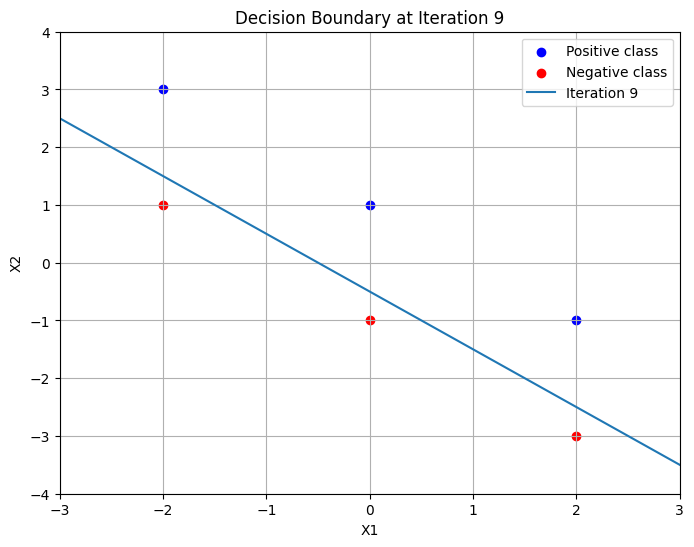

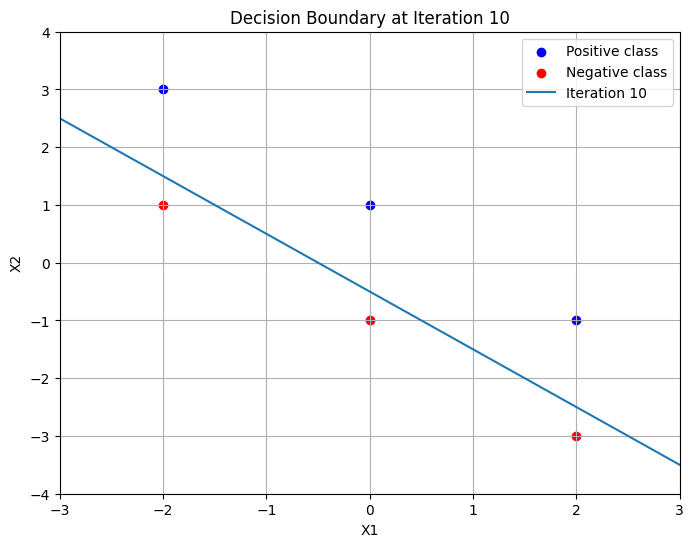

In [24]:
theta_final, theta0_final = perceptron(X, y, 10)